# 전자제조데이터분석 과제 04

아래 "Example: Visualizing Seattle Bicycle Counts" 섹션의 코드 블럭들을 실행하고, 각 코드 블럭의 의도와 동작 방식들에 대하여 간략히 분석 후 해당 내용을 코멘트하여 제출하세요.

노트북 파일 내에 텍스트 블럭을 별도로 추가하여 분석 내용을 기술하고,
plot 관련 코드들은 가급적 Skip하세요.

**Due: 2022/10/23 23:59:59**

학번:22510107

이름:이다인

## Example: Visualizing Seattle Bicycle Counts

As a more involved example of working with some time series data, let's take a look at bicycle counts on Seattle's [Fremont Bridge](http://www.openstreetmap.org/#map=17/47.64813/-122.34965).
This data comes from an automated bicycle counter, installed in late 2012, which has inductive sensors on the east and west sidewalks of the bridge.
The hourly bicycle counts can be downloaded from http://data.seattle.gov/; here is the [direct link to the dataset](https://data.seattle.gov/Transportation/Fremont-Bridge-Hourly-Bicycle-Counts-by-Month-Octo/65db-xm6k).

As of summer 2016, the CSV can be downloaded as follows:

In [1]:
!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2725k    0 2725k    0     0  1232k      0 --:--:--  0:00:02 --:--:-- 1231k


Once this dataset is downloaded, we can use Pandas to read the CSV output into a ``DataFrame``.
We will specify that we want the Date as an index, and we want these dates to be automatically parsed:

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2022-08-01 00:00:00,23.0,7.0,16.0
2022-08-01 01:00:00,12.0,5.0,7.0
2022-08-01 02:00:00,3.0,0.0,3.0
2022-08-01 03:00:00,5.0,2.0,3.0
2022-08-01 04:00:00,10.0,2.0,8.0


For convenience, we'll further process this dataset by shortening the column names and adding a "Total" column:

In [4]:
data.columns = ['Total','West', 'East']


▶ 데이터의 컬럼명을 차례로 'Total', 'West', 'East'로 수정



Now let's take a look at the summary statistics for this data:

In [5]:
data.dropna().describe()

,Total,West,East
count,87586.000000,87586.000000,87586.000000
mean,107.240849,48.086623,59.154226
std,134.790561,61.573965,83.567491
min,0.000000,0.000000,0.000000
25%,13.000000,6.000000,7.000000
50%,60.000000,27.000000,30.000000
75%,144.000000,66.000000,75.000000
max,1097.000000,698.000000,850.000000


▶ 데이터의 각 컬럼 별로 요약통계량 계산


*   East의 경우 값들이 넓게 퍼져있고 West는 East에 비해 덜 퍼져서 분포해 있다는 것을 알 수 있다.



### Visualizing the data

We can gain some insight into the dataset by visualizing it.
Let's start by plotting the raw data:

In [6]:
%matplotlib inline
import seaborn; seaborn.set()

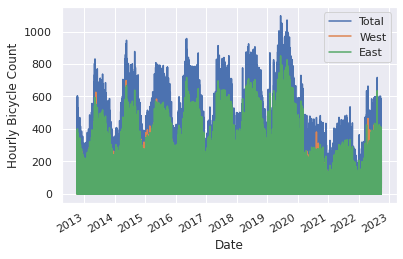

In [11]:
data.plot()
plt.ylabel('Hourly Bicycle Count');

The ~150k hourly samples are far too dense for us to make much sense of.
We can gain more insight by resampling the data to a coarser grid.
Let's resample by week:

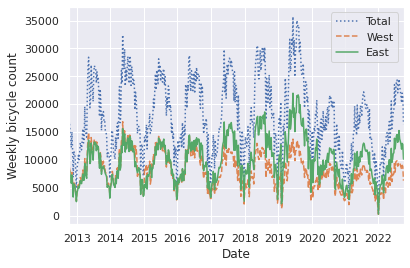

In [12]:
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count');

This shows us some interesting seasonal trends: as you might expect, people bicycle more in the summer than in the winter, and even within a particular season the bicycle use varies from week to week.

Another way that comes in handy for aggregating the data is to use a rolling mean, utilizing the ``pd.rolling_mean()`` function.
Here we'll do a 30 day rolling mean of our data, making sure to center the window:

▶ 시계열 데이터를 그냥 그리면 너무 촘촘하기 때문에 resample을 수행해 그래프를 보기 편하게 만들 수 있다. 위의 코드는 week를 단위로 resample한 데이터를 더해준다는 의미이다.



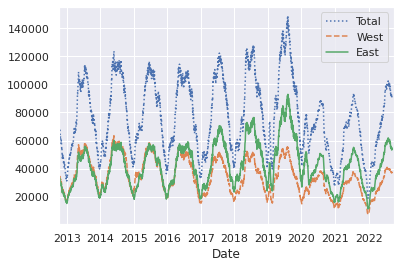

In [7]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])


The jaggedness of the result is due to the hard cutoff of the window.
We can get a smoother version of a rolling mean using a window function–for example, a Gaussian window.
The following code specifies both the width of the window (we chose 50 days) and the width of the Gaussian within the window (we chose 10 days):

▶ data.resample('D').sum() 는 resmaple을 day를 단위로 수행해 나온 데이터를 더한다는 의미이다.

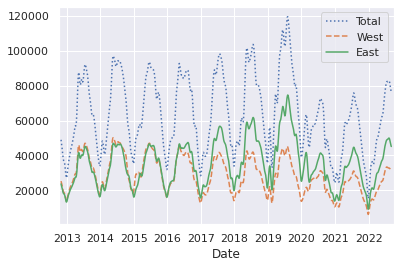

In [8]:
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);

### Digging into the data

While these smoothed data views are useful to get an idea of the general trend in the data, they hide much of the interesting structure.
For example, we might want to look at the average traffic as a function of the time of day.
We can do this using the GroupBy functionality discussed in [Aggregation and Grouping]:

In [20]:
data.index

DatetimeIndex(['2022-08-01 00:00:00', '2022-08-01 01:00:00',
               '2022-08-01 02:00:00', '2022-08-01 03:00:00',
               '2022-08-01 04:00:00', '2022-08-01 05:00:00',
               '2022-08-01 06:00:00', '2022-08-01 07:00:00',
               '2022-08-01 08:00:00', '2022-08-01 09:00:00',
               ...
               '2022-09-30 14:00:00', '2022-09-30 15:00:00',
               '2022-09-30 16:00:00', '2022-09-30 17:00:00',
               '2022-09-30 18:00:00', '2022-09-30 19:00:00',
               '2022-09-30 20:00:00', '2022-09-30 21:00:00',
               '2022-09-30 22:00:00', '2022-09-30 23:00:00'],
              dtype='datetime64[ns]', name='Date', length=87600, freq=None)

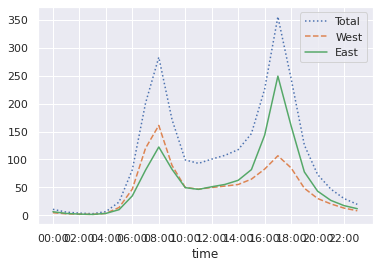

In [21]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 2 * 60 * 60 * np.arange(12)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);

▶ 현재 데이터의 index는 timestamp의 형태인데, 이를 time을 기준으로 그룹을 만들어서 평균을 계산한다.

▶ X축의 눈금을 정하기 위해 hourly_ticks를 계산한다.

The hourly traffic is a strongly bimodal distribution, with peaks around 8:00 in the morning and 5:00 in the evening.
This is likely evidence of a strong component of commuter traffic crossing the bridge.
This is further evidenced by the differences between the western sidewalk (generally used going toward downtown Seattle), which peaks more strongly in the morning, and the eastern sidewalk (generally used going away from downtown Seattle), which peaks more strongly in the evening.

We also might be curious about how things change based on the day of the week. Again, we can do this with a simple groupby:

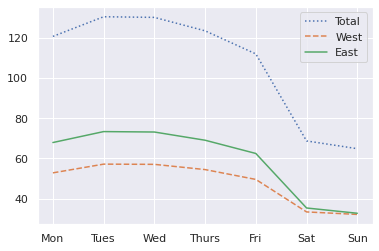

In [24]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);

▶ 이번에는 데이터의 인덱스를 일주일 단위로 그룹을 만들어서 평균을 계산한다.

This shows a strong distinction between weekday and weekend totals, with around twice as many average riders crossing the bridge on Monday through Friday than on Saturday and Sunday.

With this in mind, let's do a compound GroupBy and look at the hourly trend on weekdays versus weekends.
We'll start by grouping by both a flag marking the weekend, and the time of day:

In [25]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

▶ 이번에는 데이터의 인덱스를 일주일로 나누었을 때 평일과 주말로 나눠서 그룹을 만들어 평균을 계산한다.

Now we'll use some of the Matplotlib tools described in [Multiple Subplots](04.08-Multiple-Subplots.ipynb) to plot two panels side by side:

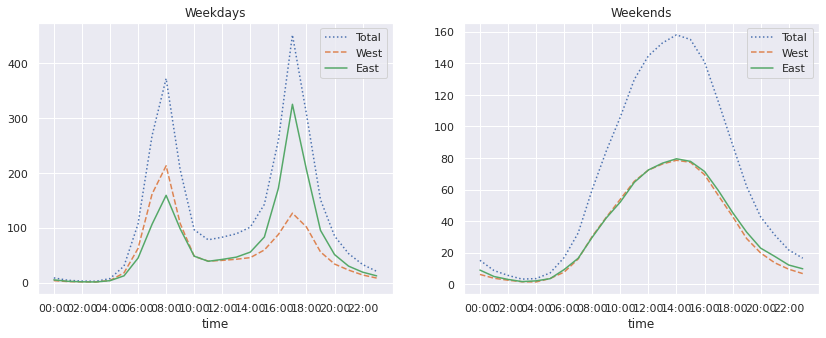

In [26]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':', '--', '-']);

The result is very interesting: we see a bimodal commute pattern during the work week, and a unimodal recreational pattern during the weekends.